In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print("x_train 배열의 크기:", len(x_train))  


2.15.0
x_train 배열의 크기: 60000


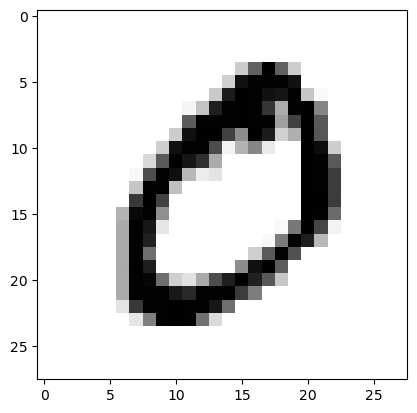

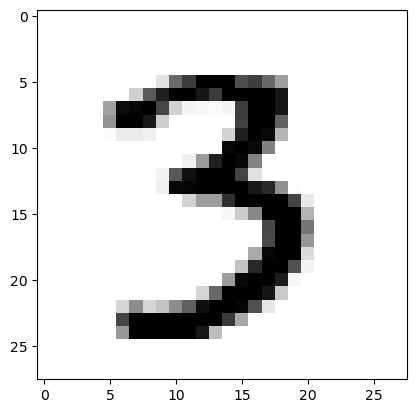

10001 번째 이미지의 숫자는 바로  3 입니다.


In [3]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape)
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

(60000, 28, 28)
최소값: 0  최대값: 255


In [6]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


Building Deep Learning Network, "LeNet" using Sequential API in tf.keras

In [8]:
import keras
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (

In [9]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)


Epoch 1/10


1875/1875 [==============================] - 8s 3ms/step - loss: 0.2093 - accuracy: 0.9368
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0668 - accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0490 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0379 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0315 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0263 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0173 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0150 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.

In [11]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0402 - accuracy: 0.9892 - 699ms/epoch - 2ms/step
test_loss: 0.04023081436753273 
test_accuracy: 0.9891999959945679


In [12]:
predicted_result = model.predict(x_test_reshaped)  
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #First x_test 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 [==============================] - 1s 2ms/step
model.predict() 결과 :  [1.1482928e-13 3.1785029e-11 6.4921220e-09 5.4538887e-08 1.1593459e-11
 2.6438224e-10 1.0353915e-13 1.0000000e+00 4.8491146e-12 3.1904918e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


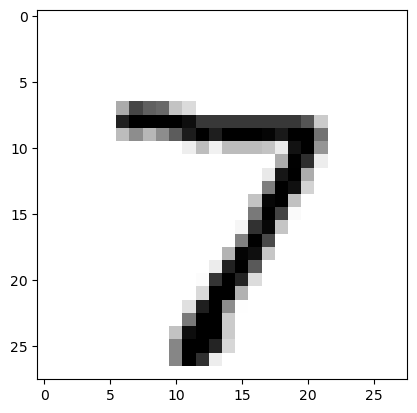

In [13]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [7.25293220e-12 6.43592444e-04 2.96449307e-02 1.27310023e-01
 2.53974797e-08 1.14221095e-08 2.33830072e-13 8.42393696e-01
 6.89576245e-06 7.52852372e-07]
라벨: 2, 예측결과: 7


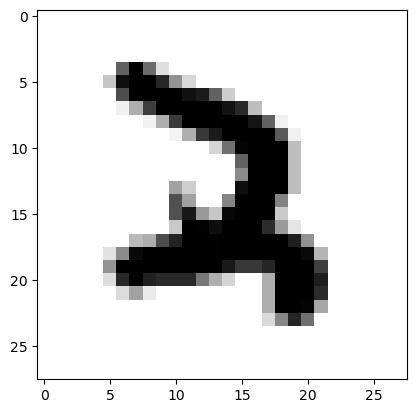

예측확률분포: [7.25293220e-12 6.43592444e-04 2.96449307e-02 1.27310023e-01
 2.53974797e-08 1.14221095e-08 2.33830072e-13 8.42393696e-01
 6.89576245e-06 7.52852372e-07]
라벨: 2, 예측결과: 7


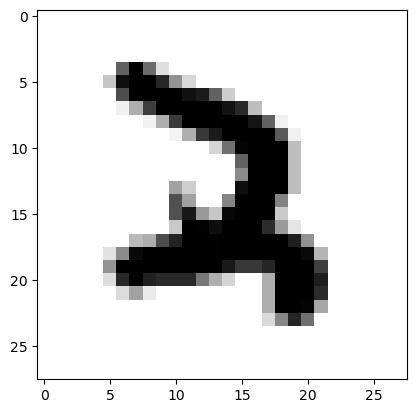

예측확률분포: [4.6233628e-10 7.0970607e-10 4.7142589e-06 9.9979347e-01 7.5616291e-14
 1.1763514e-08 6.0919399e-07 2.9304847e-08 2.0122074e-04 7.8591737e-11]
라벨: 8, 예측결과: 3


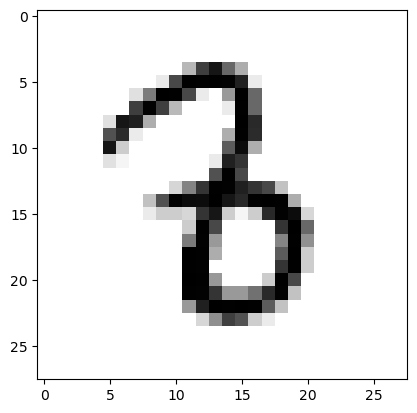

예측확률분포: [4.0136148e-09 1.1186468e-07 6.4431034e-09 2.8571830e-07 2.0808287e-07
 9.8709947e-01 2.3550776e-06 9.0492604e-06 3.1855809e-08 1.2888508e-02]
라벨: 9, 예측결과: 5


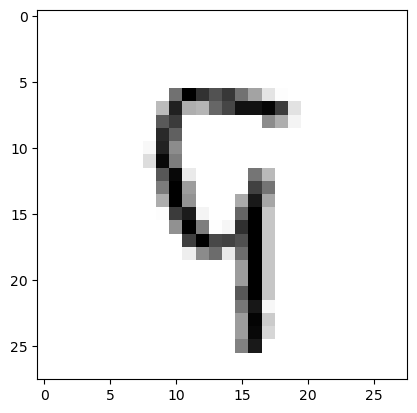

예측확률분포: [5.4163420e-14 5.5786010e-08 1.3083075e-02 1.8320607e-04 2.5061386e-14
 2.9695769e-13 1.1155982e-13 8.1753284e-01 1.6920079e-01 1.6782839e-12]
라벨: 8, 예측결과: 7


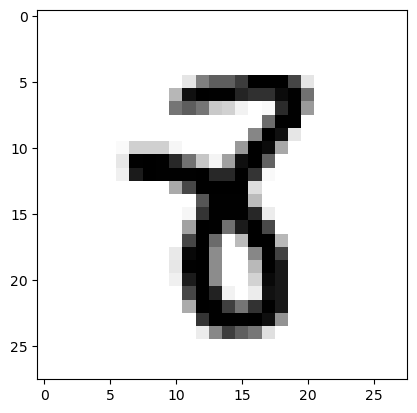

In [14]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # ith test_labels != y_test 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# Selecting 5 random cases from wrong_predict_list.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [15]:
# Tuning Hyperparameters 
n_channel_1= 32
n_channel_2= 64
n_dense= 64
n_train_epoch= 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [16]:
# Model Compile
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# Model Training
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# Test Model
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2) 

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1492 - accuracy: 0.9540
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0492 - accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0344 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0183 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0116 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0096 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0083 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

In [17]:
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

test_loss: 0.03630560263991356 
test_accuracy: 0.9909999966621399
